## **StockAnalytica: Tech Stock Market Analysis**

The StockAnalytica project involves an in-depth analysis of data from the stock market, focusing primarily on technology stocks.

Using the Pandas library, we will extract and scrutinize relevant information, create visual representations, and employ various methods to assess the risk associated with individual stocks based on their performance history.


Here are the key questions we aim to address:

1. <b>Price Change Over Time</b>: How has the stock price of each company evolved over the given period?

2. <b>Average Daily Returns</b>: What is the average daily return for each stock, providing insights into their historical performance?

3. <b>Moving Averages</b>: What are the moving averages for different stocks, indicating trends and potential patterns?

4. <b>Correlation of Daily Returns</b>: How do the daily returns of different stocks correlate with each other?

5. <b>Risk Assessment</b>: How much risk is associated with investing in a particular stock, and what is the potential value at risk?

6. <b>Predicting Future Stock Behavior</b>: What approaches can be employed to make informed predictions about future stock movements?

In [13]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
import yfinance as yf
from datetime import datetime

We're going to analyse some tech stocks, and it seems like a good idea to look at their performance over the last year. We can create a list with the stock names, for future looping.


In [14]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [15]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day)

In [21]:
# Create empty dictionaries to hold the data
stock_data = {}

# Fetch data for each stock
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

# Access the data for a specific stock, for example, Apple (AAPL)
for s in tech_list:
  globals() [s] = stock_data[s]


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
# Thanks to the globals method, Apple's stock data will be stored in the AAPL global variable dataframe. Let's see if that worked.
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-17,141.070007,142.899994,140.270004,142.410004,141.570175,85250900
2022-10-18,145.490005,146.699997,140.610001,143.750000,142.902252,99136600
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.011597,61758300
2022-10-20,143.020004,145.889999,142.649994,143.389999,142.544373,64522000
2022-10-21,142.869995,147.850006,142.649994,147.270004,146.401489,86548600


In [25]:
#Basic stats for Apple's Stock
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,163.292710,165.021992,161.782390,163.491594,163.115068,6.546845e+07
std,18.877906,18.673270,19.098570,18.856730,19.035088,2.132282e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,147.919998,149.959999,146.379997,148.070000,147.498627,5.053360e+07
50%,165.000000,166.309998,164.029999,165.330002,164.878983,6.075020e+07
75%,178.275002,179.985001,177.090004,178.500000,178.499405,7.487370e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


And that easily, we can make out what the stock's minimum, maximum, and average price was for the last year.

In [26]:
#Some basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-10-17 to 2023-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


No missing info in the dataframe above, so we can go about our business.


**How has the stock price of each company evolved over the given period?**

<Axes: xlabel='Date'>

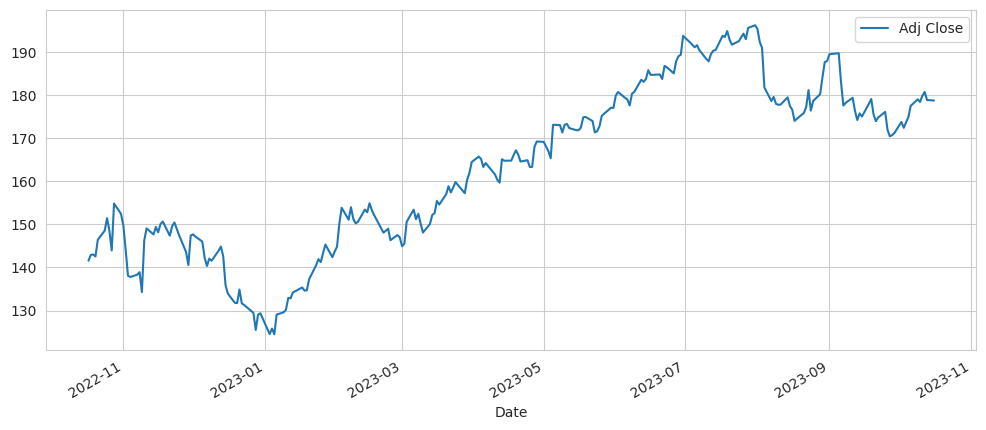

In [27]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend=True,figsize=(12,5))

Similarily, we can plot change in a stock's volume being traded, over time.

<Axes: xlabel='Date'>

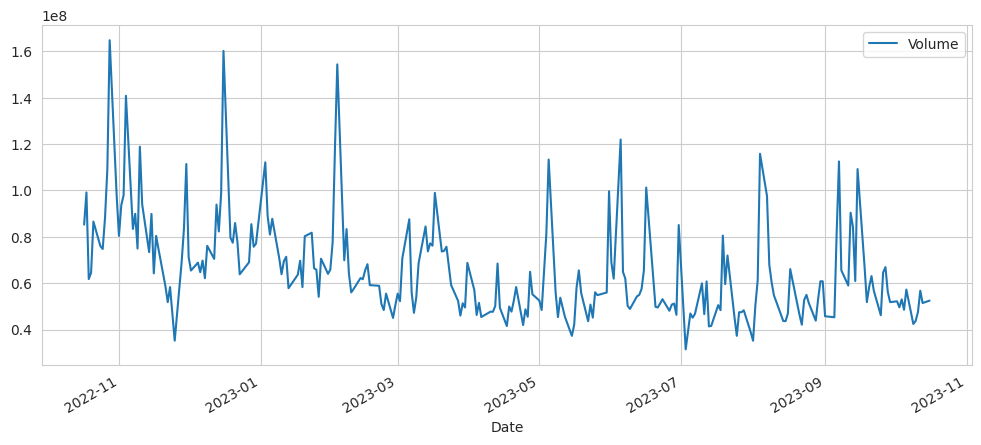

In [28]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend=True,figsize=(12,5))

**What was the moving average of various stocks?**

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [30]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))

    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [31]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2023-10-10,178.100006,179.720001,177.949997,178.389999,178.389999,43698000,174.192001,174.808501,178.651587
2023-10-11,178.199997,179.850006,177.600006,179.800003,179.800003,47551100,175.129002,175.088001,178.340663
2023-10-12,180.070007,182.339996,179.039993,180.710007,180.710007,56743100,176.131003,175.336501,178.108457
2023-10-13,181.419998,181.929993,178.139999,178.850006,178.850006,51427100,176.895003,175.528502,177.867213
2023-10-16,176.750000,179.080002,176.509995,178.720001,178.720001,52472600,177.392003,175.566002,177.806721


<Axes: xlabel='Date'>

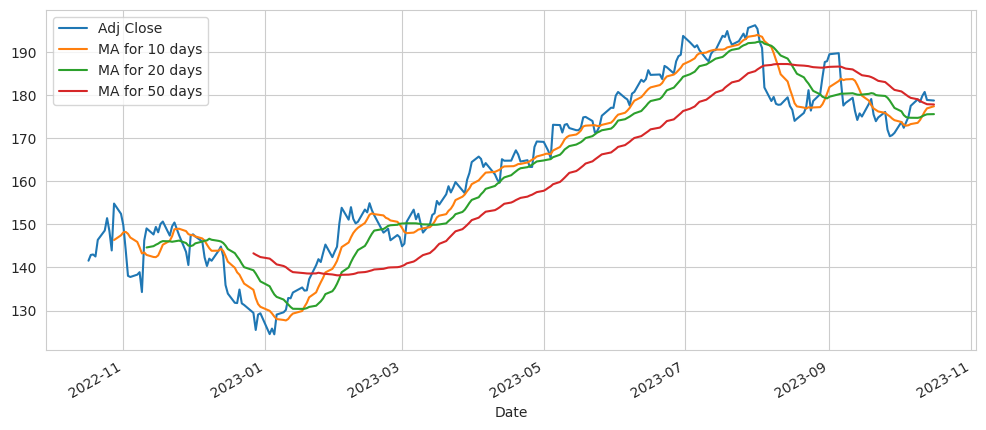

In [32]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

**What was the daily return average of a stock?**

In [33]:
#The daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [34]:
AAPL['Daily Return'].tail()

Date
2023-10-10   -0.003352
2023-10-11    0.007904
2023-10-12    0.005061
2023-10-13   -0.010293
2023-10-16   -0.000727
Name: Daily Return, dtype: float64

<Axes: xlabel='Date'>

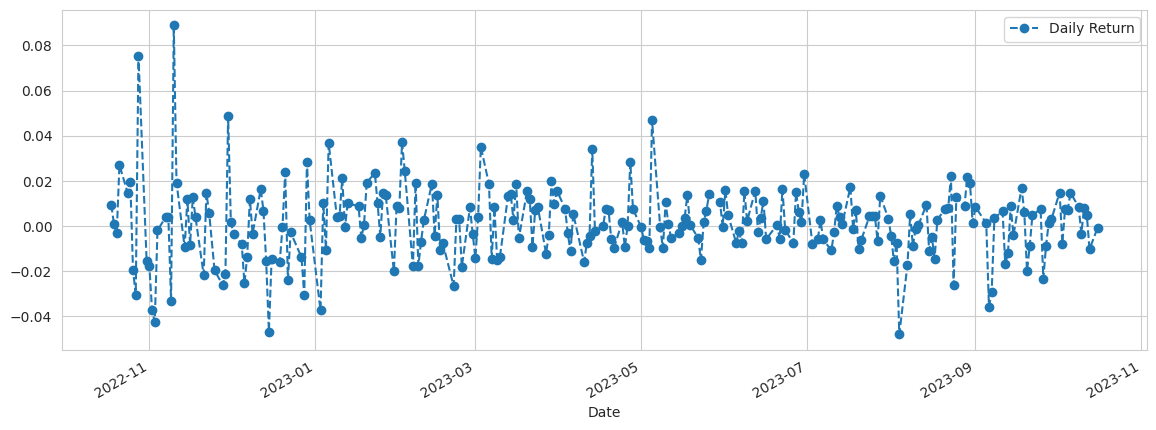

In [35]:
#Plotting the daily return
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

<Axes: xlabel='Daily Return', ylabel='Count'>

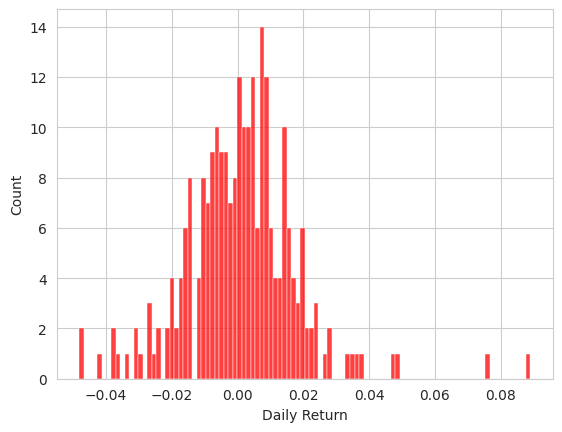

In [36]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='red')

Positive daily returns seem to be slightly more frequent than negative returns for Apple.

**What was the correlation between daily returns of different stocks?**

In [37]:
#Reading just the 'Adj Close' column this time
close_df = yf.download(tech_list, start=start, end=end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [38]:
close_df.tail()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-10-10,178.389999,129.479996,138.059998,328.390015
2023-10-11,179.800003,131.830002,140.550003,332.420013
2023-10-12,180.710007,132.330002,138.970001,331.160004
2023-10-13,178.850006,129.789993,137.360001,327.730011
2023-10-16,178.720001,132.550003,139.100006,332.640015


Everything works as expected.

Just as we did earlier, we can use Pandas' pct_change method to get the daily returns of our stocks.

In [39]:
rets_df = close_df.pct_change()

In [40]:
rets_df.tail()

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-10-10,-0.003352,0.009512,-0.002601,-0.004336
2023-10-11,0.007904,0.018150,0.018036,0.012272
2023-10-12,0.005061,0.003793,-0.011242,-0.003790
2023-10-13,-0.010293,-0.019195,-0.011585,-0.010358
2023-10-16,-0.000727,0.021265,0.012667,0.014982


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll visualise a scatterplot for the relationship between the daily return of a stock to itself.

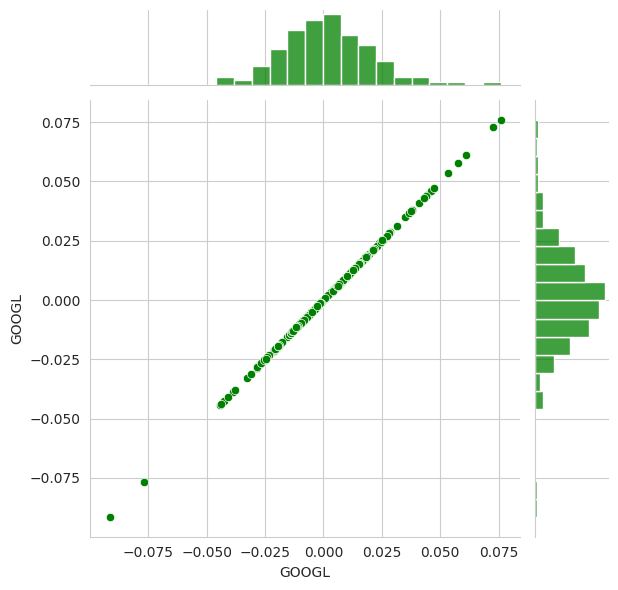

In [43]:
sns.jointplot(x='GOOGL', y='GOOGL', data=rets_df, kind='scatter', color='green')

As expected, the relationship is perfectly linear because we're trying to correlate something with itself. Now, let's check out the relationship between Google and Apple's daily returns.

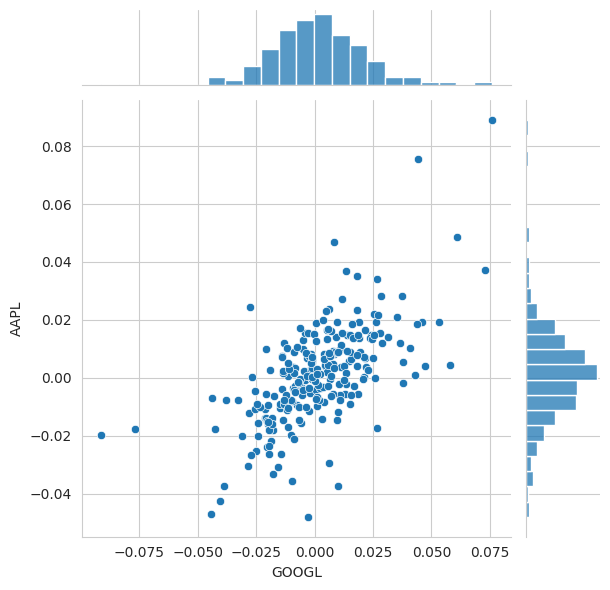

In [45]:
sns.jointplot(x='GOOGL',y='AAPL',data=rets_df,kind='scatter')

There seems to be a minor correlation between the two stocks, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combinations of stocks?

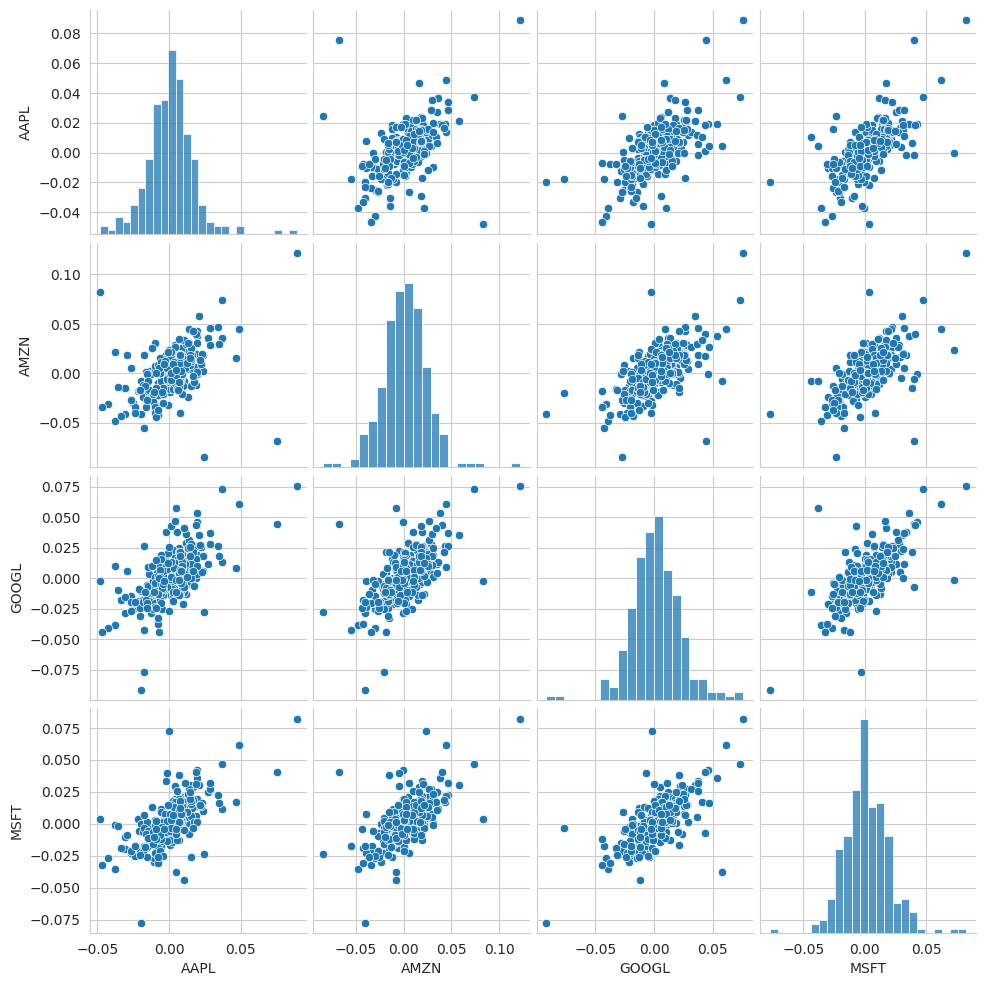

In [46]:
sns.pairplot(rets_df.dropna())

Quick and dirty overarching visualisation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficients, we can use seaborn's corrplot method.

<Axes: ylabel='Date'>

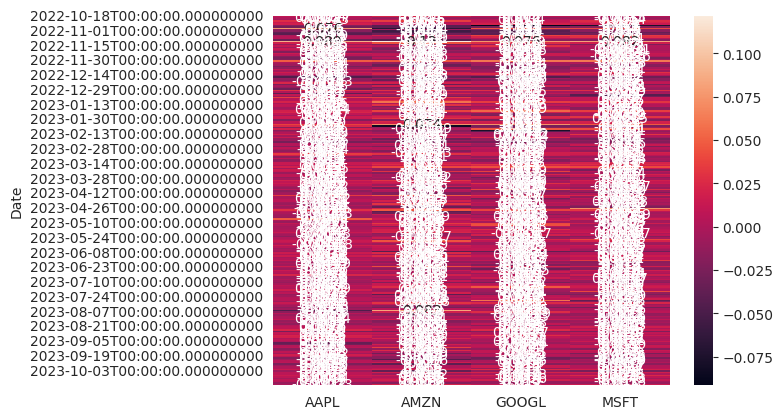

In [47]:
sns.heatmap(rets_df.dropna(),annot=True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

**How much value do we put at risk by investing in a particular stock?**

A basic way to quantify risk is to compare the expected return (which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [48]:
rets = rets_df.dropna()

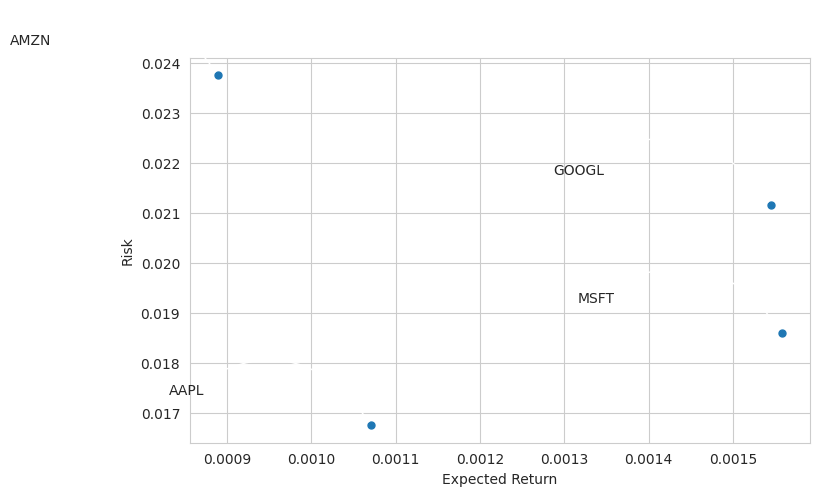

In [49]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')


#For adding annotatios in the scatterplot
for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Apple and Amazon stocks have higher expected returns, but also have a higher risk

**Value at Risk**

We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

**Bootstrap Method**

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.

<Axes: xlabel='Daily Return', ylabel='Count'>

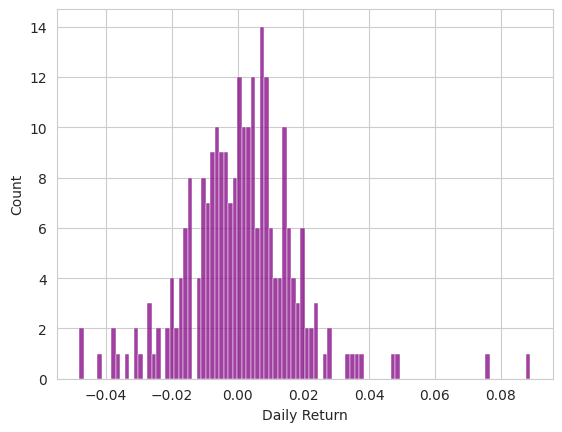

In [50]:
sns.histplot(x=AAPL['Daily Return'].dropna(),bins=100,color='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [51]:
rets.head()


,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2022-10-18,0.009409,0.022585,0.008002,0.004084
2022-10-19,0.000765,-0.011086,-0.011313,-0.008470
2022-10-20,-0.003267,0.001564,0.003413,-0.001396
2022-10-21,0.027059,0.035315,0.011603,0.025281
2022-10-24,0.014803,0.004190,0.013745,0.021188


In [52]:
#Using Pandas built in qualtile method
rets['AAPL'].quantile(0.05)

-0.025810269793350875

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.58% (of the investment).

**How can we attempt to predict future stock behaviour?**

**Monte Carlo Method**

Check out this link for more info on the Monte Carlo method. In short: in this method, we run simulations to predict the future many times, and aggregate the results in the end for some quantifiable value.

In [53]:
days = 365

#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [54]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price

    shock = np.zeros(days)
    drift = np.zeros(days)

    for x in range(1,days):

        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))

        drift[x] = mu * dt

        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))

    return price

We're going to run the simulation of Google stocks. Let's check out the opening value of the stock.

In [58]:
GOOGL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-10,138.500000,139.720001,137.330002,138.059998,138.059998,27786600
2023-10-11,138.580002,141.110001,138.580002,140.550003,140.550003,25884300
2023-10-12,141.050003,141.220001,138.259995,138.970001,138.970001,24765500
2023-10-13,139.380005,140.000000,136.619995,137.360001,137.360001,23420500
2023-10-16,138.169998,139.630005,137.990005,139.100006,139.100006,28492000


Let's do a simulation of 100 runs, and plot them.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

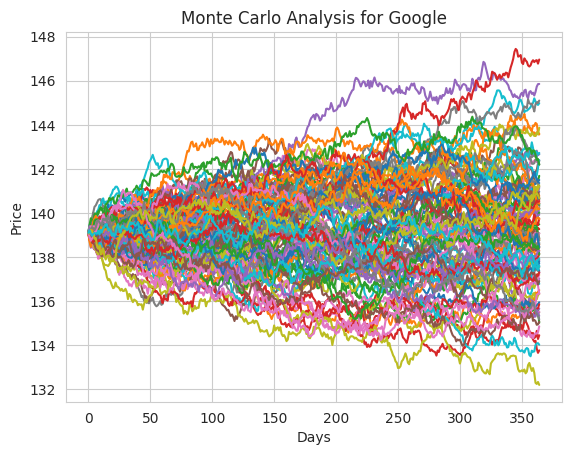

In [59]:
start_price = 139.100 #Taken from above

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [60]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

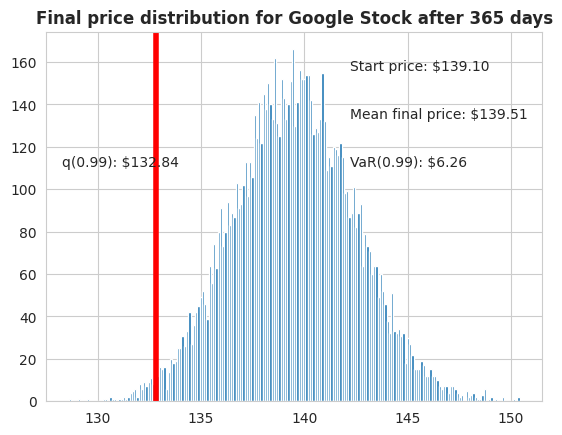

In [61]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

We can infer from this that, with a starting price of USD139.10, the average final price over 10,000 runs was USD139.15. The red line indicates the value at risk (VaR) at the desired confidence interval. For this stock, the VaR at a 99% confidence level is USD6.26, meaning that 99% of the time, the maximum potential loss would be USD6.26, which corresponds to a lower bound of USD132.84